In [1]:
suppressMessages(suppressWarnings(require(data.table)))
suppressMessages(suppressWarnings(require(scales)))
suppressMessages(suppressWarnings(require(raster)))
suppressMessages(suppressWarnings(require(sp)))
suppressMessages(suppressWarnings(require(MASS)))
suppressMessages(suppressWarnings(require(rgeos)))
suppressMessages(suppressWarnings(require(plyr)))
suppressMessages(suppressWarnings(require(progress)))
suppressMessages(suppressWarnings(require(argparse)))
suppressMessages(suppressWarnings(require(ggplot2)))
suppressMessages(suppressWarnings(require(tidyverse)))

In [2]:
process_sim <- function(log) {
    """
    read and process csv from input path sim_REP_s_SCOEF_Nw_NW_...log
    """

    # get parameters
    params <- str_split(log, '_')[[1]]
    rep <- as.numeric(params[2])
    scoef <- as.numeric(params[4])
    nw <- as.numeric(params[6])
    # read df
    df <- fread(log)
    # set allele appearance as time 0
    df <- df[df$tick > 98,]
    df$tick <- df$tick - 99
    # standardize allele distance between 0 and 1
    df$allele_distance <- rescale(df$allele_distance)
    # add parameters to dataframe
    df$rep <- rep
    df$scoef <- scoef
    df$nw <- nw

    return(df)
    }

In [3]:
directory = "out/"
unf <- Sys.glob(paste0(directory, '*.log'))
df <- process_sim(unf[1])
for (f in unf[2:length(unf)]){
    pd <- process_sim(f)
    df <- rbind(df, pd)
}

In [5]:
summary <- df %>% group_by(scoef, nw, tick) %>% summarize(allele_freq = mean(allele_freq, na.rm = TRUE),
                                         allele_distance = mean(allele_distance, na.rm = TRUE))

`summarise()` has grouped output by 'scoef', 'nw'. You can override using the
`.groups` argument.


Warning message:
"Removed 924 row(s) containing missing values (geom_path)."


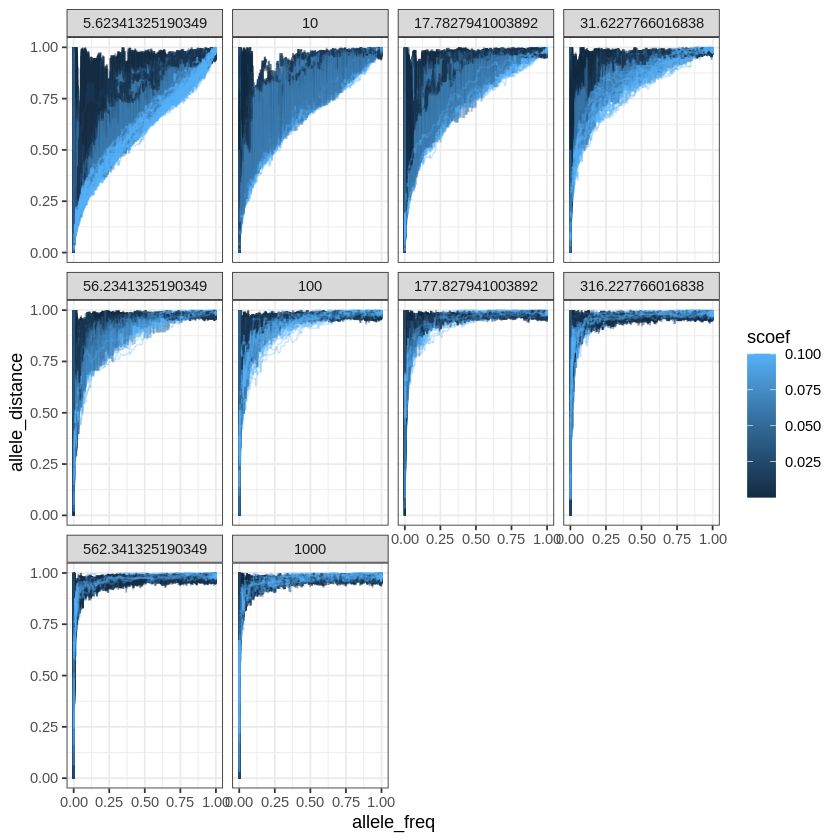

In [6]:
ggplot(df) + theme_bw() +
    geom_line(aes(x=allele_freq, y=allele_distance, color=scoef, group=rep), alpha=0.25) + 
    facet_wrap(~nw)

Warning message:
"Removed 7 row(s) containing missing values (geom_path)."


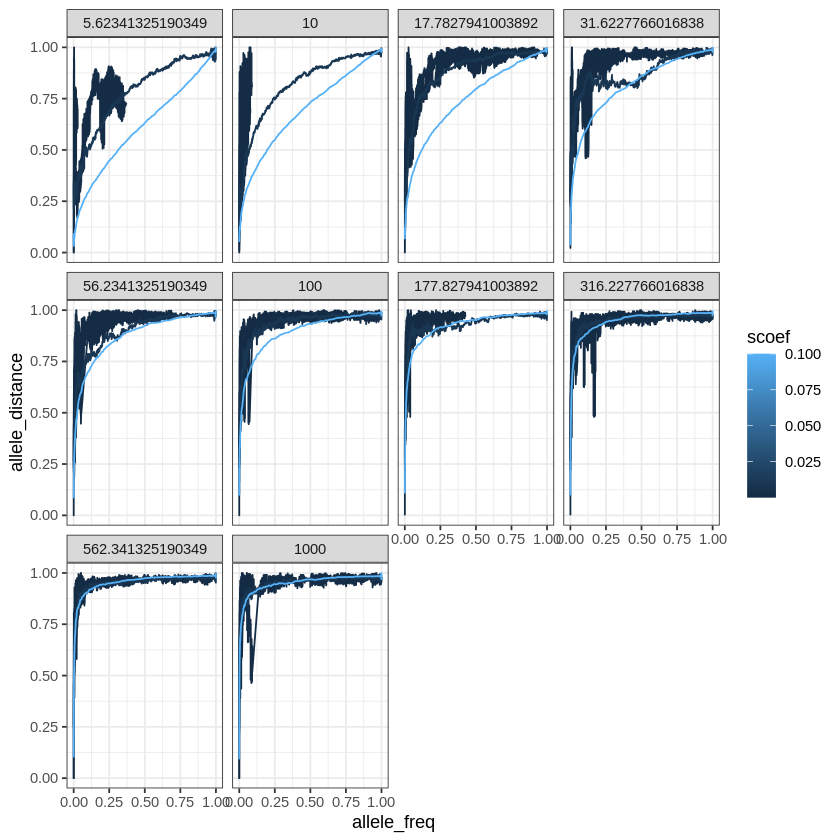

In [9]:
ggplot(summary) + theme_bw() +
    geom_line(aes(x=allele_freq, y=allele_distance, color=scoef, group=scoef)) + 
    facet_wrap(~nw)